In [1]:
import numpy as np
from tetris_defs import *
import cv2
       
def get_value(roi):

    val = 0
    if (roi[2,:]>0).sum() == 3:
        val = 3
        if (roi[1,:]>0).sum() == 3:
            val = 6
            if (roi[0,:]>0).sum() == 3:
                val = 9
    else:
        val = (roi[2,:]>0).sum()
        
    return val

def get_value_4(roi):

    val = 0
    if (roi[3,:]>0).sum() == 3: # 아래가 완벽할경우 
        val = 0
        if (roi[2,:]>0).sum() == 3: 
            val = 3
            if (roi[1,:]>0).sum() == 3:
                val = 6
                if (roi[0,:]>0).sum() == 3:
                    val = 9
    else:
        val = (roi[3,:]>0).sum()
        
    return val

def is_hole(vec): # 블럭 뒀을때 구멍 있으면 패널티 줌
    
    val = 0
    vec = vec > 0 
    vec = vec*1

    for i_idx in range(len(roi[:,0])-1):
        if vec[i_idx] == 1 and vec[i_idx+1] == 0:
            val = -6
            
    return val

In [2]:
########## 테트리스 초기화
num_of_blocks = 7

board       = np.zeros([20,11])
board_temp  = np.zeros([20,11])
board_final = np.zeros([20,10])

cnt = 1

total_score = 0

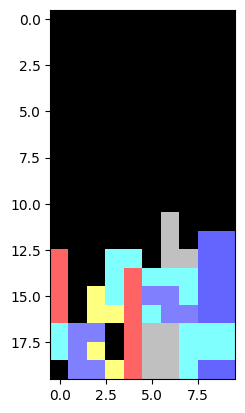

In [23]:
########## 테트리스 동작 및 결과 표시
### 여기를 계속 실행해 주세요! (실행 : ctrl + enter)
### 결과는 아래 출력 되며 영상은 result 폴더에 저장됩니다.
### 처음부터 다시 실행하고 싶으면 위의 테트리스 초기화 재실행 후 다시 여기 실행
import random

block_idx = random.randrange(1,num_of_blocks+1)
rot_R = rot_range(block_idx)
w_step = 1

max_cost = 0
max_i = 0
max_j = 0

# 여기서 모든 경우의수 다 둬 보고
for i_idx in range(rot_R):
    
    rot = i_idx+1
    blocks = get_block(block_idx, rot)*block_idx
    max_pos = get_max_pos(block_idx, rot, blocks)
    
    for j_idx in range(max_pos+1):
        position = j_idx
        bH, bW = blocks.shape
        board_temp = np.copy(board)
        board_temp[:,10] = 1
        
        max_step = 0
        
        for step in range(21-bH):
            roi = board_temp[step:step+bH,position:position+bW]

            col_mul = np.multiply(roi,blocks)

            if col_mul.sum() == 0:
                max_step = step
            else:
                break
        
        board_temp[max_step:bH+max_step,position:position+bW] += blocks  
        
        
        if block_idx == 1:
            roi = board_temp[max_step-1:bH+max_step+1,position:position+bW+1]
            if roi.shape[0] == 3:
                cur_cost = get_value(roi) + max_step/w_step
            elif roi.shape[0] == 4:
                cur_cost = get_value_4(roi) + max_step/w_step
        elif block_idx == 2:
            cur_cost = max_step/w_step
        else:
            roi = board_temp[max_step:bH+max_step+1,position:position+bW]
            if roi.shape[0] == 3:
                cur_cost = get_value(roi) + max_step/w_step + is_hole(roi[:,0]) + is_hole(roi[:,1]) + is_hole(roi[:,2])
            elif roi.shape[0] == 4:
                cur_cost = get_value_4(roi) + max_step/w_step + is_hole(roi[:,0]) + is_hole(roi[:,1]) + is_hole(roi[:,2])
            
            
        if cur_cost > max_cost:
            max_cost = cur_cost
            max_i = i_idx
            max_j = j_idx
            
# 최고 값에서 실제로 쌓는다
rot = max_i+1
blocks = get_block(block_idx, rot)*block_idx
max_pos = get_max_pos(block_idx, rot, blocks)
position = max_j
bH, bW = blocks.shape
    
for step in range(21-bH):
    roi = board[step:step+bH,position:position+bW]
    col_mul = np.multiply(roi,blocks)
    
    if col_mul.sum() == 0:
        max_step = step
    else:
        break
        
board[max_step:bH+max_step,position:position+bW] += blocks
score, board = block_erase(board)
visualize(board, cnt, 1)
cnt = cnt+1        